<a href="https://colab.research.google.com/github/VyomPandya/Summer-Internship-Sem-7/blob/main/22IT157_INTERNSHIP_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📥 Step 1: Importing Data from a CSV File

In this step, we are loading the Titanic dataset from a CSV file into a Pandas DataFrame for further analysis.

```python
import pandas as pd


In [1]:
import pandas as pd

# Direct raw link (replace with the actual raw CSV URL if needed)
df = pd.read_csv('netflix_data.csv')

### 🔍 Step 2: Exploring the Initial Structure and Summary of the Dataset
---

```python
print(df.head())
print(df.info())
print(df.describe(include='all'))
```

**What this code does:**

- `print(df.head())`: Displays the first 5 rows of the dataframe.

- `print(df.info())`: Provides a concise summary of the dataframe including:
  - The number of entries (rows)
  - Column names and their data types
  - Count of non-null values in each column
  - Memory usage

- `print(df.describe(include='all'))`: Generates comprehensive statistical summaries for all columns:
  - For numeric columns: count, mean, standard deviation, min, 25%, 50% (median), 75%, and max values
  - For categorical columns: count, unique values, top (most frequent) value, and frequency of the top value
  The `include='all'` parameter ensures statistics are calculated for all columns, not just numeric ones.

In [2]:
print(df.head())       # First five rows
print(df.info())       # Column types & non-null counts
print(df.describe(include='all'))  # Summary statistics for numeric & categorical data

                 title   type                     genres  releaseYear  \
0                Ariel  movie     Comedy, Crime, Romance       1988.0   
1  Shadows in Paradise  movie       Comedy, Drama, Music       1986.0   
2         Forrest Gump  movie             Drama, Romance       1994.0   
3      American Beauty  movie                      Drama       1999.0   
4    The Fifth Element  movie  Action, Adventure, Sci-Fi       1997.0   

      imdbId  imdbAverageRating  imdbNumVotes availableCountries  
0  tt0094675                7.4        9169.0                NaN  
1  tt0092149                7.4        7998.0                NaN  
2  tt0109830                8.8     2377936.0                NaN  
3  tt0169547                8.3     1248516.0                NaN  
4  tt0119116                7.6      527078.0                NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21722 entries, 0 to 21721
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
--

### 🧹 Step 3: Handling Missing Values and Duplicate Entries in the Dataset
---

```python
# Count missing per column
print(df.isna().sum())
# Remove exact duplicates
df.drop_duplicates(inplace=True)
```

**What this code does:**

- `df.isna().sum()`: This counts the number of missing (NaN) values in each column of the DataFrame. It helps you understand which columns have incomplete data and may need imputation or removal.

- `df.drop_duplicates(inplace=True)`: This removes all exact duplicate rows from the DataFrame.

Duplicate rows are those where all column values are identical.

The inplace=True parameter ensures that the operation is performed on the existing DataFrame, without needing to assign it to a new variable.


In [3]:
# Count missing per column
print(df.isna().sum())

# Remove exact duplicates
df.drop_duplicates(inplace=True)

title                   718
type                      0
genres                  367
releaseYear              40
imdbId                 1626
imdbAverageRating      1809
imdbNumVotes           1809
availableCountries    21562
dtype: int64



### 📊 Step 4: Visualizing the Distribution of IMDb Ratings
---

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['imdbAverageRating'], bins=30, kde=True)
plt.title("Distribution of IMDb Average Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()
```

**What this code does:**

- `import seaborn as sns` and `import matplotlib.pyplot as plt`:  
  These import the necessary libraries for creating visualizations. Seaborn is a statistical data visualization library built on top of Matplotlib.

- `sns.histplot(...)`:  
  Plots a histogram of the `imdbAverageRating` column from the DataFrame `df`.  
  - `bins=30`: Divides the data into 30 bins for better granularity.  
  - `kde=True`: Adds a Kernel Density Estimate line to visualize the distribution smoothly.

- `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`:  
  These add the plot title and axis labels for better readability and interpretation.

- `plt.show()`:  
  Displays the plot.


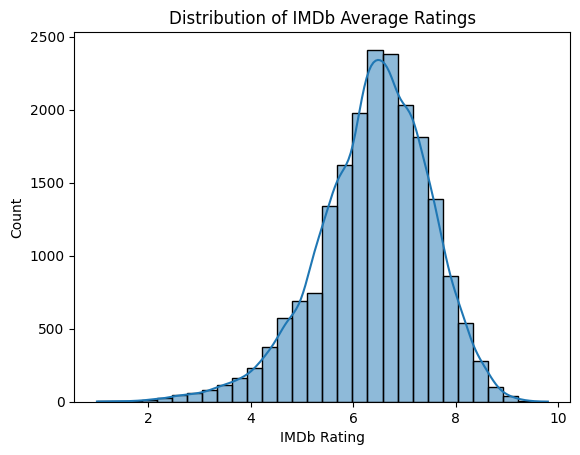

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['imdbAverageRating'], bins=30, kde=True)
plt.title("Distribution of IMDb Average Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()


### 📦 Step 5: Visualizing Rating Spread by Title Type
---

```python
sns.boxplot(data=df, x='type', y='imdbAverageRating')
plt.title("Rating Spread by Title Type")
plt.xlabel("Type")
plt.ylabel("IMDb Rating")
plt.show()
```

**What this code does:**

- `sns.boxplot(...)`:  
  Creates a boxplot to show the distribution of IMDb ratings across different types of titles (e.g., movie, short, series).  
  - `data=df`: Uses the DataFrame `df`.  
  - `x='type'`: Sets the categorical variable for the x-axis.  
  - `y='imdbAverageRating'`: Sets the numerical variable for the y-axis.

- `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`:  
  These functions label the plot for better clarity and understanding.

- `plt.show()`:  
  Renders the final plot.

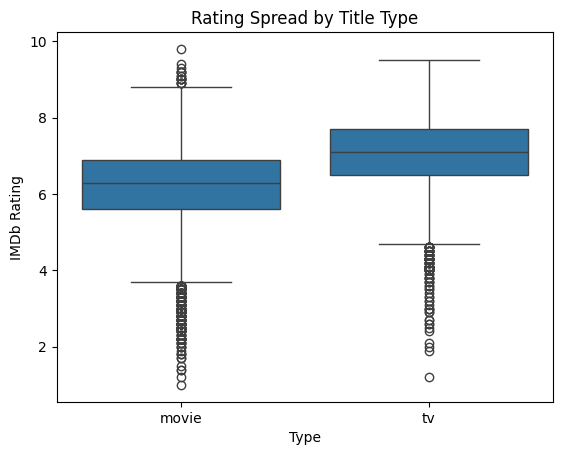

In [5]:
sns.boxplot(data=df, x='type', y='imdbAverageRating')
plt.title("Rating Spread by Title Type")
plt.xlabel("Type")
plt.ylabel("IMDb Rating")
plt.show()



### 🎬 Step 6: Analyzing and Visualizing Top Genres
---

```python
# Assume 'genres' is a comma-separated string; split and explode
genre_counts = (df.assign(genres=df['genres'].str.split(','))
                  .explode('genres')
                  .genres.str.strip()
                  .value_counts()
                  .head(10))

sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
```

**What this code does:**

- `df['genres'].str.split(',')`:  
  Splits the genre string into a list for each row.

- `.explode('genres')`:  
  Converts each list of genres into separate rows (one genre per row), enabling proper counting.

- `.genres.str.strip()`:  
  Removes leading and trailing whitespace from each genre.

- `.value_counts().head(10)`:  
  Counts the frequency of each genre and selects the top 10 most common genres.

- `sns.barplot(...)`:  
  Visualizes the top 10 genres using a horizontal bar plot.  
  - `x=genre_counts.values`: The number of titles in each genre.  
  - `y=genre_counts.index`: The genre names.

- Plot formatting functions (`plt.title`, `plt.xlabel`, `plt.ylabel`) enhance readability.  
- `plt.show()`: Displays the plot.

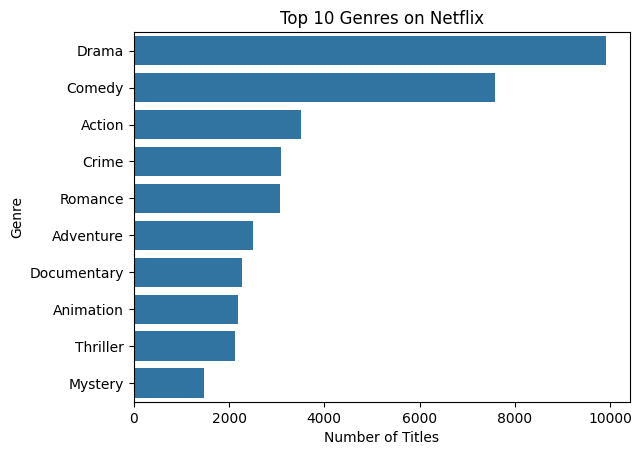

In [6]:
# Assume 'genres' is a comma-separated string; split and explode
genre_counts = (df.assign(genres=df['genres'].str.split(','))
                  .explode('genres')
                  .genres.str.strip()
                  .value_counts()
                  .head(10))

sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

### 📊 Step 7: Pairwise Plot of Release Year, IMDb Ratings & Votes
---

```python
sns.pairplot(df[['releaseYear','imdbAverageRating','imdbNumVotes']],
             kind='reg', diag_kind='kde')
plt.suptitle("Pairwise Plots of Year, Ratings & Votes", y=1.02)
plt.show()
```

**What this code does:**

- `sns.pairplot(...)`:  
  Creates pairwise plots (scatter plots + regression lines) between selected numeric features.  
  - `df[['releaseYear','imdbAverageRating','imdbNumVotes']]`: Selects relevant columns for the plot.  
  - `kind='reg'`: Adds regression lines to scatter plots.  
  - `diag_kind='kde'`: Uses Kernel Density Estimation on the diagonal plots.

- `plt.suptitle(...)`:  
  Adds a centered title above the entire plot grid.

- `plt.show()`:  
  Displays the visualization.

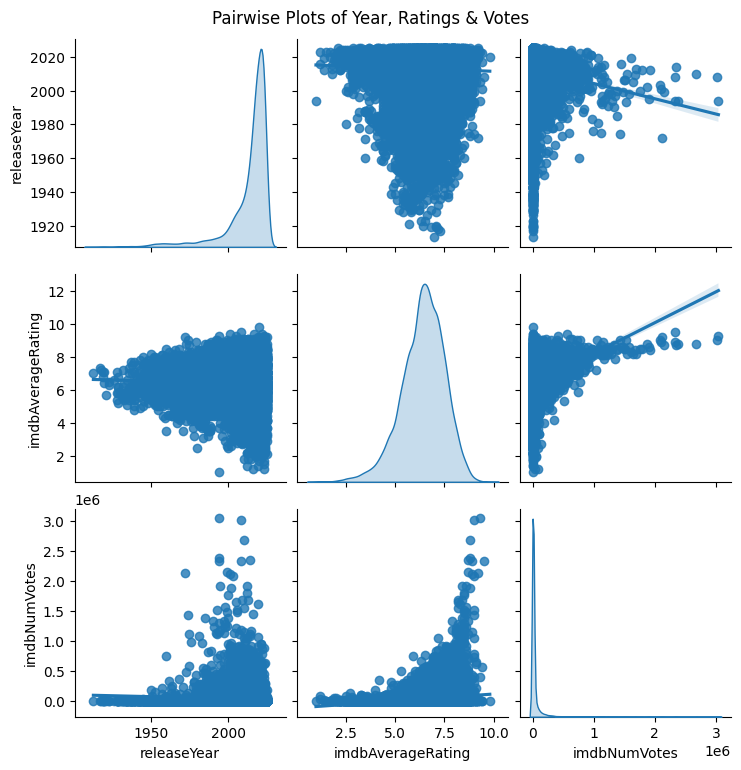

In [7]:
sns.pairplot(df[['releaseYear','imdbAverageRating','imdbNumVotes']],
             kind='reg', diag_kind='kde')
plt.suptitle("Pairwise Plots of Year, Ratings & Votes", y=1.02)
plt.show()

### 📈 Step 8: Correlation Matrix of Key Features
---

```python
corr = df[['releaseYear','imdbAverageRating','imdbNumVotes']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()
```

**What this code does:**

- `df[['releaseYear','imdbAverageRating','imdbNumVotes']].corr()`:  
  Calculates the Pearson correlation coefficients between the selected numeric features.

- `sns.heatmap(...)`:  
  Visualizes the correlation matrix using a heatmap.  
  - `corr`: The correlation matrix computed earlier.  
  - `annot=True`: Displays the correlation values in each cell.  
  - `fmt=".2f"`: Formats numbers to 2 decimal places.  
  - `square=True`: Makes each cell square-shaped for a clean layout.

- `plt.title(...)`:  
  Adds a descriptive title to the heatmap.

- `plt.show()`:  
  Renders the heatmap.


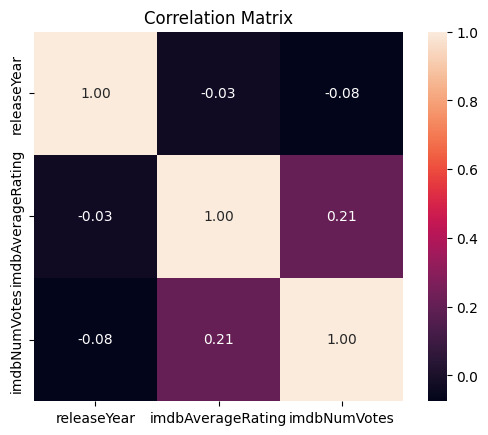

In [8]:
corr = df[['releaseYear','imdbAverageRating','imdbNumVotes']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

### 📄 Step 9: Generating an EDA Report with `ydata-profiling`
---

```python
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Netflix EDA Report", explorative=True)
profile.to_file("netflix_eda_report.html")
```

**What this code does:**

- `!pip install ydata-profiling`:  
  Installs the `ydata-profiling` library, which is used to create automated EDA (Exploratory Data Analysis) reports.

- `from ydata_profiling import ProfileReport`:  
  Imports the `ProfileReport` class from the installed library.

- `ProfileReport(...)`:  
  Initializes the EDA report for the DataFrame `df`.  
  - `title="Netflix EDA Report"`: Sets the title of the report.  
  - `explorative=True`: Enables a detailed exploratory mode for deeper analysis.

- `profile.to_file("netflix_eda_report.html")`:  
  Exports the EDA report as an interactive HTML file named `netflix_eda_report.html`.

In [9]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Netflix EDA Report", explorative=True)
profile.to_file("netflix_eda_report.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=925a2bdc2eae58cd7aa44b30937671a01b5accc4a4cdf85919068da08ba51f35
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00,  8.93it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
from google.colab import files
files.download("netflix_eda_report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 📄 Step 10 : Feature Engineering for Netflix Dataset
---

```python
# Safely split and count countries, handling NaN values
df['country_count'] = df['availableCountries'] \
    .fillna('') \
    .str.split(',') \
    .apply(lambda x: len([i for i in x if i.strip()]))  # count non-empty entries

# 1.2 Title length (number of characters)
df['title_length'] = df['title'] \
    .astype(str) \
    .str.len()

# 1.3 Age of title as of 2025
CURRENT_YEAR = 2025
df['title_age'] = CURRENT_YEAR - df['releaseYear']

# Display the results
print(df[['title', 'country_count', 'title_length', 'title_age']].head())
```

**What this code does:**

- `df['country_count'] = ...`:  
  Creates a new column that counts the number of countries where each title is available.
  - `fillna('')`: Replaces any NaN values with empty strings to avoid errors.
  - `str.split(',')`: Splits the comma-separated country list into arrays.
  - `apply(lambda x: len([i for i in x if i.strip()]))`: Counts only non-empty entries after splitting.

- `df['title_length'] = ...`:  
  Creates a feature that calculates the length (number of characters) of each title.
  - `astype(str)`: Ensures the title is treated as a string.
  - `str.len()`: Counts the number of characters in each title.

- `df['title_age'] = ...`:  
  Calculates how old each title is as of 2025.
  - `CURRENT_YEAR - df['releaseYear']`: Subtracts the release year from the current year.

- `print(df[...].head())`:  
  Displays the first 5 rows of the DataFrame with the newly created features to verify the results.

In [11]:
# Safely split and count countries, handling NaN values
df['country_count'] = df['availableCountries'] \
    .fillna('') \
    .str.split(',') \
    .apply(lambda x: len([i for i in x if i.strip()]))  # count non-empty entries

# 1.2 Title length (number of characters)
df['title_length'] = df['title'] \
    .astype(str) \
    .str.len()

# 1.3 Age of title as of 2025
CURRENT_YEAR = 2025
df['title_age'] = CURRENT_YEAR - df['releaseYear']

# Display the results
print(df[['title', 'country_count', 'title_length', 'title_age']].head())


                 title  country_count  title_length  title_age
0                Ariel              0             5       37.0
1  Shadows in Paradise              0            19       39.0
2         Forrest Gump              0            12       31.0
3      American Beauty              0            15       26.0
4    The Fifth Element              0            17       28.0


### 📊 Step 11 : Temporal Analysis of Netflix Titles
---

```python
import seaborn as sns
import matplotlib.pyplot as plt

# 2.1 Annual count of titles released
annual_counts = df.groupby('releaseYear') \
    .size() \
    .reset_index(name='count')

# Line plot of counts by year
sns.lineplot(data=annual_counts, x='releaseYear', y='count')
plt.title("Number of Netflix Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.show()

# 2.2 Annual average IMDb rating
annual_avg_rating = df.groupby('releaseYear')['imdbAverageRating'] \
    .mean() \
    .reset_index(name='avg_rating')

# Line plot of average rating by year
sns.lineplot(data=annual_avg_rating, x='releaseYear', y='avg_rating')
plt.title("Average IMDb Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()
```

**What this code does:**

- `import seaborn as sns` and `import matplotlib.pyplot as plt`:  
  Imports the necessary libraries for data visualization. Seaborn is built on Matplotlib and provides a higher-level interface for creating attractive visualizations.

- **Annual Count Analysis**:
  - `df.groupby('releaseYear').size()`:  
    Groups the Netflix titles by their release year and counts the number of titles in each group.
  - `reset_index(name='count')`:  
    Converts the Series to a DataFrame with columns 'releaseYear' and 'count'.
  - The subsequent lines create a line plot showing how the number of Netflix titles has changed over time, with properly labeled axes and title.

- **Annual Rating Analysis**:
  - `df.groupby('releaseYear')['imdbAverageRating'].mean()`:  
    Groups titles by release year and calculates the average IMDb rating for each year.
  - `reset_index(name='avg_rating')`:  
    Converts the result to a DataFrame with columns 'releaseYear' and 'avg_rating'.
  - The plot visualizes how the average IMDb rating of Netflix content has trended over the years.

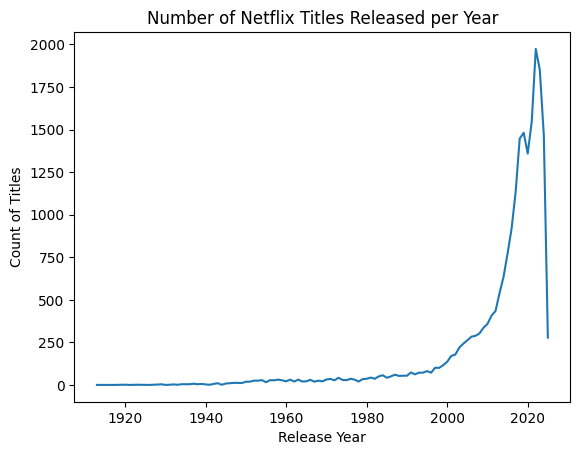

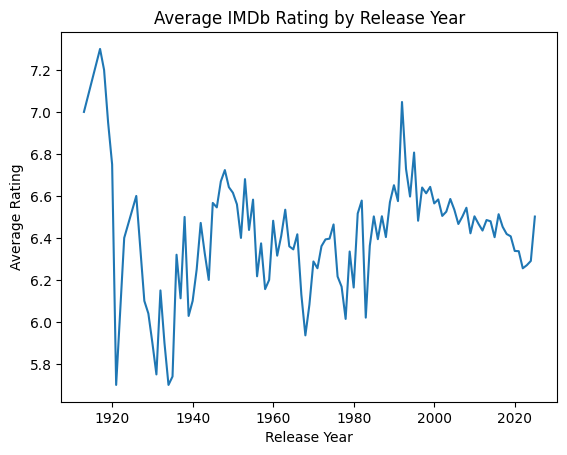

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2.1 Annual count of titles released
annual_counts = df.groupby('releaseYear') \
    .size() \
    .reset_index(name='count')  # :contentReference[oaicite:3]{index=3}

# Line plot of counts by year
sns.lineplot(data=annual_counts, x='releaseYear', y='count')
plt.title("Number of Netflix Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.show()

# 2.2 Annual average IMDb rating
annual_avg_rating = df.groupby('releaseYear')['imdbAverageRating'] \
    .mean() \
    .reset_index(name='avg_rating')  # :contentReference[oaicite:4]{index=4}

# Line plot of average rating by year
sns.lineplot(data=annual_avg_rating, x='releaseYear', y='avg_rating')
plt.title("Average IMDb Rating by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()


### 🌎 Step 12: Geographic Distribution Analysis of Netflix Content
---

```python
import folium

# 3.1 Explode the countries and count occurrences
countries_exploded = (
    df.assign(availableCountries=df['availableCountries'].str.split(','))
      .explode('availableCountries')
)

# Remove whitespace around country names
countries_exploded['availableCountries'] = countries_exploded['availableCountries'].str.strip()

# Count appearances
country_counts = (
    countries_exploded['availableCountries']
      .value_counts()
      .reset_index()
)

# Rename columns
country_counts.columns = ['country', 'count']

# Print to verify
print(country_counts.head())

# 3.2 Create a Folium choropleth map
m = folium.Map(location=[20, 0], zoom_start=2)

# Use a publicly hosted GeoJSON of world countries
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Choropleth layer
folium.Choropleth(
    geo_data=world_geo,
    data=country_counts,
    columns=['country', 'count'],
    key_on='feature.properties.name',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Netflix Titles'
).add_to(m)

# 3.3 Save the map
m.save('netflix_titles_by_country.html')
print("Choropleth map saved to 'netflix_titles_by_country.html'")
```

**What this code does:**

- **Data Preparation for Geographic Analysis**:
  - `df.assign(availableCountries=df['availableCountries'].str.split(','))`:  
    Creates a new DataFrame with the comma-separated country list split into arrays.
  - `.explode('availableCountries')`:  
    Transforms the DataFrame so each country gets its own row (one country per row instead of lists).
  - `str.strip()`:  
    Cleans the country names by removing any leading/trailing whitespace.
  - `.value_counts()`:  
    Counts how many Netflix titles are available in each country.
  - `.reset_index()`:  
    Converts the result to a DataFrame with index as a regular column.
  - Renaming columns for clarity with `country_counts.columns = ['country', 'count']`.

- **Creating an Interactive Map**:
  - `folium.Map(location=[20, 0], zoom_start=2)`:  
    Initializes a world map centered at coordinates [20, 0] with zoom level 2.
  - Uses a standard GeoJSON file with world country boundaries from GitHub.
  - `folium.Choropleth(...)`:  
    Creates a choropleth map where countries are colored based on the number of Netflix titles available.
    - `geo_data`: Source of geographical boundaries.
    - `data`: The count data prepared earlier.
    - `columns`: Specifies which columns contain the country names and values.
    - `key_on`: Defines how to match country names in the data with geographical features.
    - `fill_opacity` and `line_opacity`: Control the appearance of the map.

- **Output**:
  - `.save('netflix_titles_by_country.html')`:  
    Exports the interactive map as an HTML file that can be opened in any web browser.
  - The final print statement confirms the successful creation of the map.


In [13]:
import folium

# 3.1 Explode the countries and count occurrences
countries_exploded = (
    df.assign(availableCountries=df['availableCountries'].str.split(','))
      .explode('availableCountries')
)

# Remove whitespace around country names
countries_exploded['availableCountries'] = countries_exploded['availableCountries'].str.strip()

# Count appearances
country_counts = (
    countries_exploded['availableCountries']
      .value_counts()
      .reset_index()
)

# Rename columns
country_counts.columns = ['country', 'count']

# Print to verify
print(country_counts.head())

# 3.2 Create a Folium choropleth map
m = folium.Map(location=[20, 0], zoom_start=2)

# Use a publicly hosted GeoJSON of world countries
world_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Choropleth layer
folium.Choropleth(
    geo_data=world_geo,
    data=country_counts,
    columns=['country', 'count'],
    key_on='feature.properties.name',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Netflix Titles'
).add_to(m)

# 3.3 Save the map
m.save('netflix_titles_by_country.html')
print("Choropleth map saved to 'netflix_titles_by_country.html'")


  country  count
0      PH     70
1      ID     70
2      TH     64
3      MY     59
4      SG     58
Choropleth map saved to 'netflix_titles_by_country.html'


In [14]:
from google.colab import files
files.download('netflix_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>